In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from matplotlib.patches import Rectangle
from matplotlib.patches import Circle

In [2]:
my_numbers = [
    [15,18,43,50,67],
    [5,23,39,55,71],
    [10,28,'Free',48,68],
    [14,27,32,49,63],
    [9,25,37,58,74]
]

my_numbers

[[15, 18, 43, 50, 67],
 [5, 23, 39, 55, 71],
 [10, 28, 'Free', 48, 68],
 [14, 27, 32, 49, 63],
 [9, 25, 37, 58, 74]]

In [3]:
called_numbers = [
    15,50,2,1,4,9,10,23,39,75,73,56
]
called_numbers

[15, 50, 2, 1, 4, 9, 10, 23, 39, 75, 73, 56]

In [4]:
num_mat = np.matrix([[1 if j == 'Free' or j in called_numbers else 0 for j in x] for x in my_numbers])
np.array(num_mat.sum(axis=1)).reshape(1,5)[0]

array([2, 2, 2, 0, 1])

In [5]:
np.array(num_mat.sum(axis=0))[0]

array([3, 1, 2, 1, 0])

In [18]:
row_counts = np.array(num_mat.sum(axis=1)).reshape(1,5)[0]
col_counts = np.array(num_mat.sum(axis=0))[0]

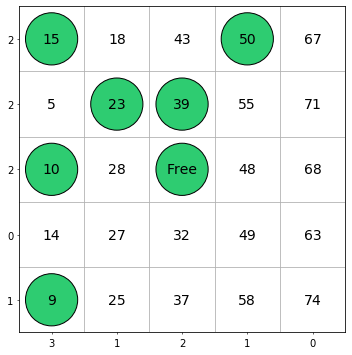

In [23]:
fig, ax = plt.subplots(figsize=(6,6))

ax.set_ylim([-4.5, 0.5])
ax.set_xlim([-0.5, 4.5])
ax.set_aspect('equal')

ax.xaxis.set_ticklabels([])
ax.yaxis.set_ticklabels([])

# Set major ticks 
ax.set_xticks([0.5, 1.5, 2.5, 3.5])
ax.set_yticks([-3.5, -2.5, -1.5, -0.5])

# Set minor ticks 
ax.set_xticks([0, 1, 2, 3, 4], minor=True)
ax.set_yticks([-4, -3, -2, -1, 0], minor=True)
ax.xaxis.set_ticklabels(col_counts, minor=True)
ax.yaxis.set_ticklabels(np.flip(row_counts), minor=True)

for axi in (ax.xaxis, ax.yaxis):
    for tic in axi.get_major_ticks():
        tic.tick1line.set_visible(False)
        tic.tick2line.set_visible(False)
                
ax.grid(True)

circle = Circle((2, -2), 0.4, fill=True, edgecolor='black')
circle.set_facecolor('#2ecc71')

for row_index, row in enumerate(my_numbers):
    for column_index, cell in enumerate(row):
        if cell in called_numbers or cell == 'Free':
            circle = Circle((column_index, -row_index), 0.4, fill=True, edgecolor='black')
            circle.set_facecolor('#2ecc71')
            ax.add_patch(circle)
        
        ax.scatter(column_index, -row_index, alpha=0)
        ax.text(x = column_index, 
                y = -row_index, 
                s = cell,
                ha="center", 
                va="center", 
                fontsize=14, 
                color='black')